In [81]:
from playsound import playsound
from pydub import AudioSegment
from pydub.playback import play   
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import librosa
import os
from PIL import Image
import pathlib
#import csv from sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Get the list of all files and directories
path = "Audios/wav/ShutUp/"
dir_list = os.listdir(path)


files_lst = [] #names of the files
label_lst = [] # labels 
for i in range(len(dir_list)):
    if '.wav' in dir_list[i]:
        files_lst.append(dir_list[i])
        if 'neg' in dir_list[i]:
            label_lst.append('negative')
        if 'neutral' in dir_list[i]:
            label_lst.append('neutral')
        if 'pos' in dir_list[i]:
            label_lst.append('positive') 
            
            
path_to_wav = "audios/wav/ShutUp/" #path to the folder
#features
channels_lst = []
sample_width_lst = []
rmse_lst = []
chroma_stft_lst = []
spec_cent_lst = []
spec_bw_lst = []
rolloff_lst = []
zcr_lst = []
mfcc_lst = []
intensity_lst = []
sample_width_lst = []
frame_rate_lst = []
frame_width_lst = []


for i in range(len(files_lst)):
    file = path_to_wav + files_lst[i]
    y, sr = librosa.load(file, mono=True, duration=30)
    audio_segment = AudioSegment.from_file(file)
    
    intensity = audio_segment.dBFS
    intensity_lst.append(intensity)
    
   
    
    rmse = librosa.feature.rms(y=y)
    rmse_lst.append(np.mean(rmse))
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_lst.append(np.mean(chroma_stft))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_lst.append(np.mean(spec_cent))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spec_bw_lst.append(np.mean(spec_bw))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_lst.append(np.mean(rolloff))
    
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_lst.append(np.mean(zcr))
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_lst.append(np.mean(mfcc))
    
    sample_width = audio_segment.sample_width
    sample_width_lst.append(sample_width)
    
    frame_rate = audio_segment.frame_rate
    frame_rate_lst.append(frame_rate)
    
    frame_width = audio_segment.frame_width
    frame_width_lst.append(frame_width)
    
    
# dictionary of lists to create df
dict = {'file_name': files_lst,
        'rmse' : rmse_lst,   'chroma_stft': chroma_stft_lst, 'spec_cent': spec_cent_lst,
        'spec_bw' : spec_bw_lst, 'rolloff': rolloff_lst, 'zcr': zcr_lst, 'mfcc': mfcc_lst,
        'intensity': intensity_lst  , 'frame_rate': frame_rate_lst ,
        'frame_width': frame_width_lst , 'sample_width': sample_width_lst, 
        'label' : label_lst} 
    
df1 = pd.DataFrame(dict)



In [4]:
# Get the list of all files and directories
path = "audios/wav/Serious/"
dir_list = os.listdir(path)


files_lst = [] #names of the files
label_lst = [] # labels 
for i in range(len(dir_list)):
    if '.wav' in dir_list[i]:
        files_lst.append(dir_list[i])
        if 'neg' in dir_list[i]:
            label_lst.append('negative')
        if 'neutral' in dir_list[i]:
            label_lst.append('neutral')
        if 'pos' in dir_list[i]:
            label_lst.append('positive') 
            
            
path_to_wav = "audios/wav/Serious/" #path to the folder
#features
channels_lst = []
sample_width_lst = []
rmse_lst = []
chroma_stft_lst = []
spec_cent_lst = []
spec_bw_lst = []
rolloff_lst = []
zcr_lst = []
mfcc_lst = []
intensity_lst = []
sample_width_lst = []
frame_rate_lst = []
frame_width_lst = []

for i in range(len(files_lst)):
    file = path_to_wav + files_lst[i]
    y, sr = librosa.load(file, mono=True, duration=30)
    audio_segment = AudioSegment.from_file(file)
    
    intensity = audio_segment.dBFS
    intensity_lst.append(intensity)
    
   
    
    rmse = librosa.feature.rms(y=y)
    rmse_lst.append(np.mean(rmse))
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_lst.append(np.mean(chroma_stft))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_lst.append(np.mean(spec_cent))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spec_bw_lst.append(np.mean(spec_bw))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_lst.append(np.mean(rolloff))
    
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_lst.append(np.mean(zcr))
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_lst.append(np.mean(mfcc))
    
    sample_width = audio_segment.sample_width
    sample_width_lst.append(sample_width)
    
    frame_rate = audio_segment.frame_rate
    frame_rate_lst.append(frame_rate)
    
    frame_width = audio_segment.frame_width
    frame_width_lst.append(frame_width)
    
    
# dictionary of lists to create df
dict = {'file_name': files_lst,
        'rmse' : rmse_lst,   'chroma_stft': chroma_stft_lst, 'spec_cent': spec_cent_lst,
        'spec_bw' : spec_bw_lst, 'rolloff': rolloff_lst, 'zcr': zcr_lst, 'mfcc': mfcc_lst,
        'intensity': intensity_lst  , 'frame_rate': frame_rate_lst ,
        'frame_width': frame_width_lst , 'sample_width': sample_width_lst, 
        'label' : label_lst} 
    
df2 = pd.DataFrame(dict)

In [5]:
# Get the list of all files and directories
path = "audios/wav/Kidding/"
dir_list = os.listdir(path)


files_lst = [] #names of the files
label_lst = [] # labels 
for i in range(len(dir_list)):
    if '.wav' in dir_list[i]:
        files_lst.append(dir_list[i])
        if 'neg' in dir_list[i]:
            label_lst.append('negative')
        if 'neutral' in dir_list[i]:
            label_lst.append('neutral')
        if 'pos' in dir_list[i]:
            label_lst.append('positive') 
            
            
path_to_wav = "audios/wav/Kidding/" #path to the folder
#features
channels_lst = []
sample_width_lst = []
rmse_lst = []
chroma_stft_lst = []
spec_cent_lst = []
spec_bw_lst = []
rolloff_lst = []
zcr_lst = []
mfcc_lst = []
intensity_lst = []
sample_width_lst = []
frame_rate_lst = []
frame_width_lst = []

for i in range(len(files_lst)):
    file = path_to_wav + files_lst[i]
    y, sr = librosa.load(file, mono=True, duration=30)
    audio_segment = AudioSegment.from_file(file)
    
    intensity = audio_segment.dBFS
    intensity_lst.append(intensity)
    
   
    
    rmse = librosa.feature.rms(y=y)
    rmse_lst.append(np.mean(rmse))
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_lst.append(np.mean(chroma_stft))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_lst.append(np.mean(spec_cent))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spec_bw_lst.append(np.mean(spec_bw))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_lst.append(np.mean(rolloff))
    
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_lst.append(np.mean(zcr))
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_lst.append(np.mean(mfcc))
    
    sample_width = audio_segment.sample_width
    sample_width_lst.append(sample_width)
    
    frame_rate = audio_segment.frame_rate
    frame_rate_lst.append(frame_rate)
    
    frame_width = audio_segment.frame_width
    frame_width_lst.append(frame_width)
    
    
# dictionary of lists to create df
dict = {'file_name': files_lst,
        'rmse' : rmse_lst,   'chroma_stft': chroma_stft_lst, 'spec_cent': spec_cent_lst,
        'spec_bw' : spec_bw_lst, 'rolloff': rolloff_lst, 'zcr': zcr_lst, 'mfcc': mfcc_lst,
        'intensity': intensity_lst  , 'frame_rate': frame_rate_lst ,
        'frame_width': frame_width_lst , 'sample_width': sample_width_lst, 
        'label' : label_lst} 
    
df3 = pd.DataFrame(dict)

In [23]:
data = [df1, df2, df3]
df = pd.concat(data)

data = df.drop(['file_name'],axis=1) #delete unnecessary columns
y = data.iloc[:, -1]
X = data.iloc[:, 0:10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [24]:
df.head(200)

,file_name,rmse,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc,intensity,frame_rate,frame_width,sample_width,label
0,neutral9.wav,0.019506,0.301214,1417.008622,1786.297816,2492.163547,0.064499,-15.528263,-33.774548,48000,2,2,neutral
1,neg8.wav,0.043385,0.409214,1990.477098,1715.659906,3348.413086,0.122137,-14.949607,-25.533027,48000,2,2,negative
2,neg9.wav,0.024921,0.365373,1661.736500,1645.308070,2656.224798,0.115140,-14.984047,-29.042332,44100,2,2,negative
3,neutral8.wav,0.015543,0.416782,1666.299157,1701.244822,2733.843829,0.099147,-14.740664,-34.308412,44100,2,2,neutral
4,neg10.wav,0.021471,0.381890,1784.352237,1814.952817,3173.321228,0.102283,-14.888541,-31.109102,44100,2,2,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,pos12.wav,0.078467,0.289081,2010.811289,1773.004619,3294.580078,0.111353,-11.769892,-20.329011,48000,2,2,positive
61,neg7.wav,0.066563,0.338216,1526.344839,1759.023674,2887.216870,0.067762,-13.415627,-21.004317,48000,2,2,negative
62,neg6.wav,0.073004,0.251938,1382.079120,1650.904456,2699.845863,0.055591,-14.857584,-20.323507,48000,2,2,negative
63,pos13.wav,0.062393,0.355490,1377.136460,1542.480193,2410.522461,0.069336,-13.417505,-22.360628,48000,2,2,positive


In [93]:
X = data.iloc[:, 0:10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

result = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

# print(result)
# print(y_test)
accuracy_score(y_test, result)
print("The score after 5-fold CV: " )
scores.mean()

# print('Precision: %.3f' % precision_score(y_test, result, average='weighted'))
# print('Recall: %.3f' % recall_score(y_test, result, average='weighted'))
# print('Accuracy: %.3f' % accuracy_score(y_test, result))
# print('F1 Score: %.3f' % f1_score(y_test, result, average='weighted'))

The score after 5-fold CV: 


0.3568710359408034

In [90]:
X = data.iloc[:, 0:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

result_svm = clf.predict(X_test)

#print(result_svm)
#print(y_test)
#accuracy_score(y_test, result_svm)
scores_acc = cross_val_score(clf, X, y, cv=5)
print("The score after 5-fold CV: " )
scores_acc.mean()


The score after 5-fold CV: 


0.4161733615221987

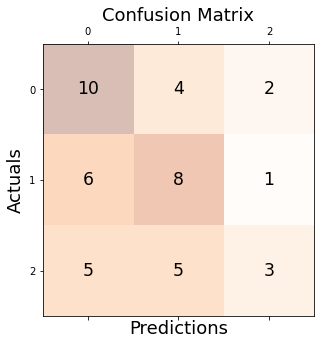

In [82]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=result_svm)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [89]:
print('Precision: %.3f' % precision_score(y_test, result_svm, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, result_svm, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, result_svm))
print('F1 Score: %.3f' % f1_score(y_test, result_svm, average='weighted'))

Precision: 0.481
Recall: 0.477
Accuracy: 0.477
F1 Score: 0.460
